In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.datasets import load_wine

In [3]:
data = load_wine()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.data)
df = pd.DataFrame(scaled_data,columns=data.feature_names)

In [6]:
df["target"] = data.target

In [7]:
cls = DecisionTreeClassifier(random_state=12)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data,data.target,test_size=0.20,random_state=12)

In [10]:
cls = DecisionTreeClassifier(random_state=12)
cls.fit(X_train,y_train)

DecisionTreeClassifier(random_state=12)

In [11]:
cls.predict(X_test)

array([2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2])

In [12]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.20,random_state=12)
cls = DecisionTreeClassifier(random_state=12)
cls.fit(X_train,y_train)

DecisionTreeClassifier(random_state=12)

In [13]:
cls.predict(X_test)

array([2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2])

In [14]:
from sklearn.metrics import precision_score,accuracy_score

In [15]:
accuracy_score(y_test,cls.predict(X_test))

0.9166666666666666

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
parameters = {
    'criterion':["gini", "entropy", "log_loss"],
    'splitter':["best", "random"],
    'max_depth':[3,4,5]
}
estimator = DecisionTreeClassifier(random_state=12)
grid_search = GridSearchCV(estimator=cls,param_grid=parameters,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [18]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [19]:
grid_search.best_score_

0.9576354679802955

In [20]:
best_tree = grid_search.best_estimator_

In [21]:
accuracy_score(y_test,best_tree.predict(X_test))

0.9444444444444444

In [22]:
best_tree.score(X_test,y_test)

0.9444444444444444

In [23]:
from sklearn.tree import plot_tree

[Text(0.375, 0.9, 'color_intensity <= 3.46\ngini = 0.653\nsamples = 142\nvalue = [45, 60, 37]\nclass = class_1'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 48\nvalue = [0, 48, 0]\nclass = class_1'),
 Text(0.5, 0.7, 'flavanoids <= 1.385\ngini = 0.6\nsamples = 94\nvalue = [45, 12, 37]\nclass = class_0'),
 Text(0.25, 0.5, 'color_intensity <= 3.725\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = class_2'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = class_1'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = class_2'),
 Text(0.75, 0.5, 'proline <= 724.5\ngini = 0.316\nsamples = 56\nvalue = [45, 11, 0]\nclass = class_0'),
 Text(0.625, 0.3, 'malic_acid <= 3.015\ngini = 0.153\nsamples = 12\nvalue = [1, 11, 0]\nclass = class_1'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]\nclass = class_1'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = class_0'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 44\nva

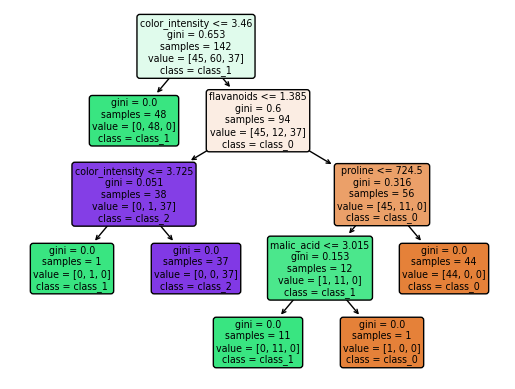

In [24]:
plot_tree(cls,feature_names=data.feature_names,class_names=(data.target_names).tolist(),filled=True,rounded=True)

In [25]:
best_tree.predict(X_test).shape

(36,)

In [26]:
y_test.shape

(36,)

<Axes: >

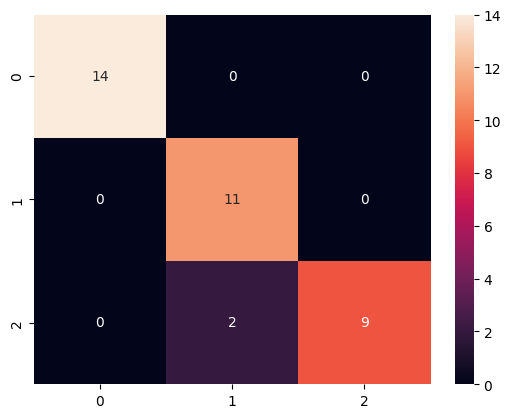

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,best_tree.predict(X_test))
sns.heatmap(conf,annot=True)